In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df=pd.read_csv('pl-tables-1993-2024.csv')
df

,season_end_year,team,position,played,won,drawn,lost,gf,ga,gd,points,notes
0,1993,Manchester Utd,1,42,24,12,6,67,31,36,84,→ Champions League via league finish
1,1993,Aston Villa,2,42,21,11,10,57,40,17,74,→ UEFA Cup via league finish
2,1993,Norwich City,3,42,21,9,12,61,65,-4,72,→ UEFA Cup via league finish 1
3,1993,Blackburn,4,42,20,11,11,68,46,22,71,NaN
4,1993,QPR,5,42,17,12,13,63,55,8,63,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
641,2024,Brentford,16,38,10,9,19,56,65,-9,39,NaN
642,2024,Nottingham Forest,17,38,9,9,20,49,67,-18,32,4-point deduction
643,2024,Luton Town,18,38,6,8,24,52,85,-33,26,Relegated
644,2024,Burnley,19,38,5,9,24,41,78,-37,24,Relegated


In [ ]:
print(df.columns)

Index(['season_end_year', 'team', 'position', 'played', 'won', 'drawn', 'lost',
       'gf', 'ga', 'gd', 'points', 'notes'],
      dtype='object')


In [ ]:
unwanted_cols = ["position","team","notes"]
df = df.drop(columns=[col for col in unwanted_cols if col in df.columns])
print("Remaining Columns after dropping unwanted:")
print(df.columns)

Remaining Columns after dropping unwanted:
Index(['season_end_year', 'played', 'won', 'drawn', 'lost', 'gf', 'ga', 'gd',
       'points'],
      dtype='object')


In [ ]:
df.isnull().sum()

,0
season_end_year,0
played,0
won,0
drawn,0
lost,0
gf,0
ga,0
gd,0
points,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Create Winner column per season
df['Winner'] = df.groupby('season_end_year')['points'].transform(lambda x: (x == x.max()).astype(int))

# Now you can drop the Season column
df = df.drop(columns=['season_end_year'])

In [ ]:
df.to_csv("cleaned_dataset_for_leaguewinner.csv",index=False)

In [ ]:
# Printing the categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns in the dataset:")
print(categorical_cols.tolist())


Categorical Columns in the dataset:
[]


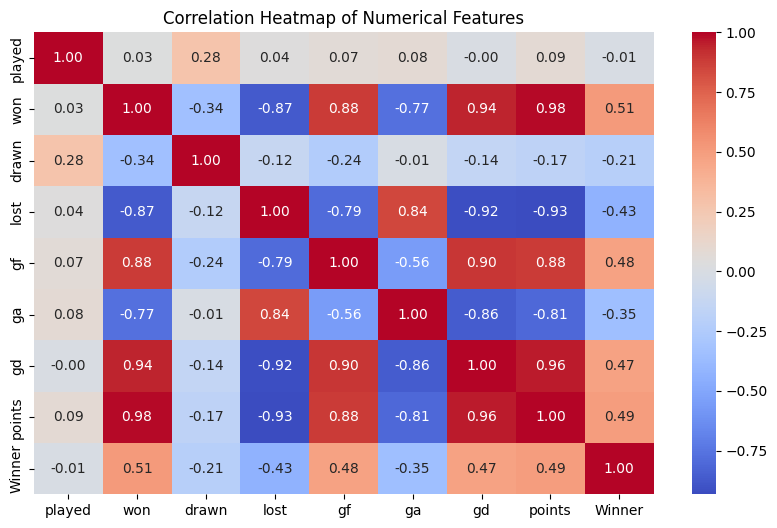

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [ ]:
# Features (performance stats)
X = df[['played','won','drawn','lost','gf','ga','gd','points']]
# Target (Winner: 1 = won league, 0 = didn't win)
y = df['Winner']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.9923076923076923

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       123
           1       1.00      0.86      0.92         7

    accuracy                           0.99       130
   macro avg       1.00      0.93      0.96       130
weighted avg       0.99      0.99      0.99       130


Confusion Matrix:
 [[123   0]
 [  1   6]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Train Random Forest with class_weight to handle imbalance
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'   # important for imbalanced dataset
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.9846153846153847

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       123
           1       1.00      0.71      0.83         7

    accuracy                           0.98       130
   macro avg       0.99      0.86      0.91       130
weighted avg       0.98      0.98      0.98       130


Confusion Matrix:
 [[123   0]
 [  2   5]]


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
# =====================================================
# ⚽ League Winner Model — Training + Save + Download
# =====================================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
from google.colab import files

# 1️⃣ Load dataset
df = pd.read_csv("/content/pl-tables-1993-2024.csv")

# 2️⃣ Drop unwanted columns EXCEPT 'season_end_year'
unwanted_cols = ["position", "team", "notes"]
df = df.drop(columns=[col for col in unwanted_cols if col in df.columns])

# 3️⃣ Create Winner column per season
df['Winner'] = df.groupby('season_end_year')['points'].transform(lambda x: (x == x.max()).astype(int))

# 4️⃣ Drop season column (not needed for ML)
df = df.drop(columns=['season_end_year'])

# 5️⃣ Simulate mid-season stats (divide numeric features by 2)
for col in ['played', 'won', 'drawn', 'lost', 'gf', 'ga', 'gd', 'points']:
    df[col] = (df[col] / 2).astype(int)

# 6️⃣ Define features and target
X = df[['played', 'won', 'drawn', 'lost', 'gf', 'ga', 'gd', 'points']]
y = df['Winner']

# 7️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===============================
# 🔹 Random Forest Model
# ===============================
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("🌳 Random Forest Results")
print("✅ Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))

# ===============================
# 🔹 Logistic Regression Model
# ===============================
log_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

print("\n📈 Logistic Regression Results")
print("✅ Accuracy:", accuracy_score(y_test, log_pred))
print("\nClassification Report:\n", classification_report(y_test, log_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, log_pred))

# =====================================================
# 💾 Save & Download the Model
# =====================================================
# ✅ Save the best model (Random Forest)
joblib.dump(rf_model, "league_winner_model.pkl")
print("✅ Model saved successfully as league_winner_model.pkl")

# ✅ Download the file to your system
files.download("league_winner_model.pkl")


🌳 Random Forest Results
✅ Accuracy: 0.9538461538461539

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       123
           1       0.60      0.43      0.50         7

    accuracy                           0.95       130
   macro avg       0.78      0.71      0.74       130
weighted avg       0.95      0.95      0.95       130


Confusion Matrix:
 [[121   2]
 [  4   3]]

📈 Logistic Regression Results
✅ Accuracy: 0.9384615384615385

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97       123
           1       0.47      1.00      0.64         7

    accuracy                           0.94       130
   macro avg       0.73      0.97      0.80       130
weighted avg       0.97      0.94      0.95       130


Confusion Matrix:
 [[115   8]
 [  0   7]]
✅ Model saved successfully as league_winner_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>